In [1]:
from sklearn.datasets import load_boston
boston = load_boston()


In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(boston.target)

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [6]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

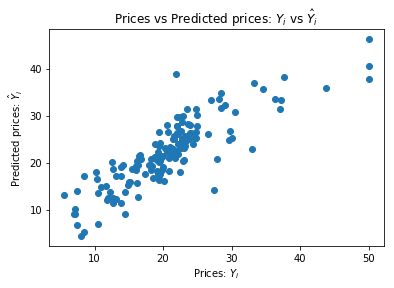

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

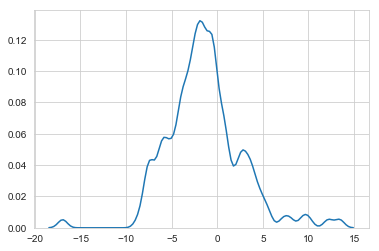

In [13]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


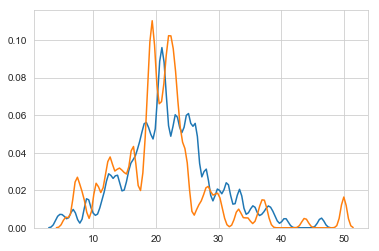

In [16]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
sns.kdeplot(np.array(Y_test),bw=0.5)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 3.3345387187819253
MSE: 18.65453872341369
RMSE: 4.319090034187027


In [20]:
r2_score(Y_test,Y_pred)

0.6903217612855297

In [21]:
r2_score(Y_train,lm.predict(X_train))

0.7432630272960186